In [1]:
import torch
from numpy import dtype
from sympy.codegen.ast import float32

x = torch.rand(3)
print(x)

torch.cuda.is_available()

x = torch.empty(3)
print(x)

tensor([0.1361, 0.9594, 0.1303])


True

In [ ]:
x = torch.empty(2, 3)
print(x)

In [ ]:
x = torch.empty(2, 3, 2)
print(x)

In [ ]:
x = torch.empty(2, 3, 2, 2)
print(x)

In [ ]:
x = torch.rand(2,2)
print(x)

In [ ]:
x = torch.zeros(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x.dtype)

In [ ]:
x = torch.ones(2,2, dtype=torch.int) #torch.double, torch.float16, torch.float64
print(x.dtype) #prints the dtype of the current tensor

In [ ]:
x = torch.ones(2,2, dtype=torch.float16)
print(x.size()) # prints the size of the current tensor

In [ ]:
x = torch.tensor([2.5, 0.1])
print(x)

BASIC OPERATIONS

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
z = torch.add(x,y)
print(z) # it does element wise addition


In [ ]:
y.add_(x) # inplace operation. Add all of the x's to the y. It modifies the variable in which it is applied to
print(y)

In [ ]:
z = x - y
z = torch.sub(x,y)
print(z)

In [ ]:
z = x * y
z = torch.mul(x,y)
print(z)
y.mul_(x) #inplace operation

In [ ]:
z = x / y
z = torch.div(x,y)

In [ ]:
#slciing operations
x = torch.rand(5,3)
print(x[:,0]) #slicing for all rows but only the first column of each row
print(x[1, :]) #slicing for only the first row but all of the columns from said row
#you can also get the value of a tensor, if and only if is a single element tensor
print(x[1, 1].item())


In [ ]:
# reshaping a tensor
x = torch.rand(4,4)
print(x)
y = x.view(16) #resizes the 16 values in a 4x4 tensor and a single 1x16. NOTE: the number of elements must match
print(y)

y = x.view(-1, 8) #if we don't want to resize to a single dimension tensor, then we can put a -1 on the first position and pytorch will correctly assume the dimension for the number of rows. i.e. 2x8
print(y.size)

In [2]:
#converting from numpy to tensor and viceversa
import numpy as np
# convert from a tensor into a np array
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))  #i.e. numpy ndarray

#if the tensor is in the cpu, then both objects(tensor and nparray) will share the same memory location, so any change to either will reflect on the other
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [4]:
#convert from a numpy array to a tensor
a = np.ones(5)
print(a)
b = torch.from_numpy(a) #be careful changing the dtype, both must match. Otherwise you get an error
print(b)

a += 1
print(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [6]:
#gpu operations
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device) #creates a tensor in the GPU 
    y = torch.ones(5) 
    y = y.to(device) # this moves the tensor to the GPU
    z = x + y # this will be computed in the GPU
    # you can't convert a GPU tensor into a numpy ndarray, so you must first move it into the cpu(numpy can only handle cpu tensors)
    z = z.to("cpu")
    print(z)

tensor([2., 2., 2., 2., 2.])


In [ ]:

x = torch.ones(5, requires_grad=True) #the requires_grad flag is FALSE by default. It tells pytorch that it will need to calculate the gradients for this tensor later in the optimization steps. 
print(x) # this will also print the requires_grad flag as well

Gradient Calculations with autograd

In [7]:
#gradients are essential for optimization
import torch 

x = torch.rand(3, requires_grad=True) # must specify the requires_grad to calculate the gradients
print(x)
y = x + 2 # pytorch creates a computational graph
# pytorch will compute the forward pass, and create a grad_fn function and calculate the gradients during the backpropagation step(dy/dx)
print(y) #has a grad_fn for AddBackward
z = y*y*2
print(z) #has a grad_fn for MulBackward
z = z.mean()
print(z) # has a grad_fn for MeanBackward

# now when we calculate the gradients for z 
z.backward() #backward gradient calculation  dz/dx. The backward function will only work with scalar values(single value), if called without an argument
print(x.grad) # the gradients are stored in x.grad
#NOTE if we don't specify the requires_grad, then we won't have a .backward() grad_fn, giving us an error
 



tensor([0.5928, 0.9772, 0.1487], requires_grad=True)
tensor([2.5928, 2.9772, 2.1487], grad_fn=<AddBackward0>)


The gradient calculation calculates a Jacobian product to get the gradients. We multiply the jacobian matrix containing the partial derivatives with a gradient vector(of the same size )

In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx
print(x.grad)

In [8]:
# sometimes during our training, when we want update the weight, we don't want pytorch to calculate the gradients
# we have 3 options for this

# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

x.requires_grad_(False) # the underscore means that pytorch will modify the variable in place
print(x)

y = x.detach() # creates a new tensor with the same values but it doesn't requrie the gradients (so requires_grad = False)
print(y)

with torch.no_grad():
    z = x + 2
    print(z)

tensor([0.5928, 0.9772, 0.1487])
tensor([0.5928, 0.9772, 0.1487])
tensor([2.5928, 2.9772, 2.1487])


In [11]:
# VERY IMPORTANT: Whenever we call the backward function, then the gradient for the tensor will be accumulated into the .grad attribute, so the values will be summed up
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad) #gradients get aggregated [[3...],[6....],[9.....]]
    weights.grad.zero_() #you must empty the gradients after each iteration to get the correct gradients [3....]
    
# same thing but with an optimizer
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step() # next iteration
optimizer.zero_grad() # empty the gradients 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


BACKPROPAGATION - THEORY WITH EXAMPLES

In [12]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

#backward pass
loss.backward() #calculates the gradients during the backward pass and stores them in the tensors that have requires_grad 
print(w.grad) #prints the stored gradients for w

##update weights
## next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


GRADIENT DESCENT WITH AUTOGRAD AND BACKPROPAGATION

In [14]:
import numpy as np

# f = w * x
# f = 2 * x
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient
    dw = gradient(x,y,y_pred)
    # update the weights
    w -= learning_rate*dw
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [17]:
#gradient calculation with torch
import torch

# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    with torch.no_grad():
        w -= learning_rate*w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [18]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [21]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')




4 1
Prediction before training: f(5) = -2.809
epoch 1: w = 0.018, loss = 54.00693512
epoch 11: w = 1.700, loss = 1.39800382
epoch 21: w = 1.970, loss = 0.03684373
epoch 31: w = 2.013, loss = 0.00158810
epoch 41: w = 2.019, loss = 0.00063898
epoch 51: w = 2.020, loss = 0.00057962
epoch 61: w = 2.019, loss = 0.00054531
epoch 71: w = 2.019, loss = 0.00051355
epoch 81: w = 2.018, loss = 0.00048367
epoch 91: w = 2.018, loss = 0.00045551
Prediction after training: f(5) = 10.036


LINEAR REGRESSION

epoch: 10, loss: 4328.2764
epoch: 20, loss: 3229.2681
epoch: 30, loss: 2434.4775
epoch: 40, loss: 1859.0608
epoch: 50, loss: 1442.0402
epoch: 60, loss: 1139.5271
epoch: 70, loss: 919.8884
epoch: 80, loss: 760.2917
epoch: 90, loss: 644.2373
epoch: 100, loss: 559.7878


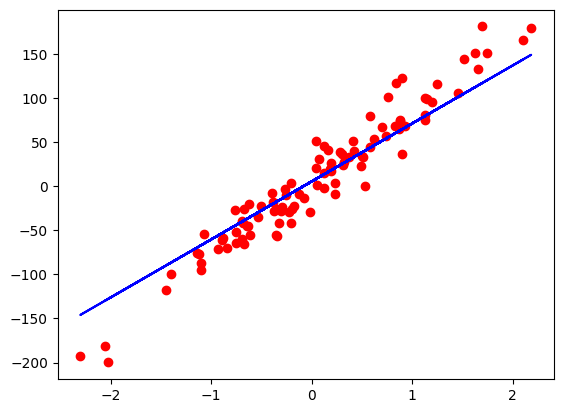

In [22]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape the tensor to a column vector
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
# 1) model design 
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) define loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    # backward pass (backpropagation) i.e. calculation of the derivatives
    loss.backward()
    # update the weights
    optimizer.step() # updates the weights. The w is already in the optimizer, so no need to call w.grad to calculate the new weights
    optimizer.zero_grad() # empty out the gradients before the next iterations. Otherwise, the backward function will sum up the gradients into the .grad attribute(.grad is internal to the optimizer in this case)
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')
        
#plot
predicted = model(x).detach() # the detach disables the tensor from being tracked on the computational graph
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

LOGISTIC REGRESSION 

In [ ]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights

